<a href="https://colab.research.google.com/github/Alisonia/tezosblockchain-analysis/blob/main/tezos_blockchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the neccesary libary
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#loading data into colab environment
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['tezos_data.csv']))
df.head()
#checking the datatypes of each columns
df.dtypes
df.isnull().sum() #there are no missing values
# Ensure 'amount' column is numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
# 1. Senders with the most transaction amounts
senders_most_amount = df.groupby('sender')['amount'].sum().sort_values(ascending=False).head(5)
senders_most_amount
#plot senders with the most transaction amount
plt.figure(figsize=(8, 6))
sns.barplot(x=senders_most_amount.values, y=senders_most_amount.index, color="blue")
plt.title('Top 5 Senders with the Most Transaction Amounts')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Sender')
plt.show()
# 2. Senders with the most transactions
senders_most_transactions = df['sender'].value_counts().head(5)
senders_most_transactions
#plotting senders with the most transaction
plt.figure(figsize=(8, 6))
sns.barplot(x=senders_most_transactions.values, y=senders_most_transactions.index, color="blue")
plt.title('Top 5 Senders with the Most Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Sender')
plt.show()
# 3. Receivers with the most transaction amounts
receivers_most_amount = df.groupby('receiver')['amount'].sum().sort_values(ascending=False).head(5)
receivers_most_amount
#plotting receivers with the most transaction amount
plt.figure(figsize=(8, 6))
sns.barplot(x=receivers_most_amount.values, y=receivers_most_amount.index, color="orange")
plt.title('Top 5 Receivers with the Most Transaction Amounts')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Receiver')
plt.show()
# 4. Receivers with the most transactions
receivers_most_transactions = df['receiver'].value_counts().head(5)
receivers_most_transactions
#plotting receivers with most transaction
plt.figure(figsize=(8, 6))
sns.barplot(x=receivers_most_transactions.values, y=receivers_most_transactions.index, color="orange")
plt.title('Top 5 Receivers with the Most Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Receiver')
plt.show()
#5 Sender and Receiver combination for most transactions together
sender_receiver_counts = df.groupby(['sender', 'receiver']).size().reset_index(name='count')
top_5_sender_receiver = sender_receiver_counts.nlargest(5, 'count')
top_5_sender_receiver
#pivot table for heatmap
heatmap_data_count = top_5_sender_receiver.pivot(index='sender', columns='receiver', values='count')

# Creating heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_count, annot=True, cmap='viridis', linewidths=.5, cbar=True)
plt.title('Top 5 Sender and Receiver Combinations by Number of Transactions')
plt.xlabel('Receiver')
plt.ylabel('Sender')
plt.show()
# Sender and Receiver combination for summed transactions.
sender_receiver_amounts = df.groupby(['sender', 'receiver'])['amount'].sum().reset_index(name='total_amount')
top_sender_receiver_amounts = sender_receiver_amounts.nlargest(5, 'total_amount')
top_sender_receiver_amounts
# Create a pivot table for heatmap
heatmap_data_amounts = top_sender_receiver_amounts.pivot(index='sender', columns='receiver', values='total_amount')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_amounts, annot=True, fmt='.2f', cmap='viridis', linewidths=.5, cbar=True)
plt.title('Top 5 Sender and Receiver Combinations by Summed Transaction Amounts')
plt.xlabel('Receiver')
plt.ylabel('Sender')
plt.show()

In [ ]:
#loading data into colab environment
from google.colab import files
uploaded = files.upload()

Saving tezos_data.csv to tezos_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['tezos_data.csv']))

In [ ]:
df.head()

,id,sender,receiver,block,operation,contract,signature,amount
0,565,tz1Zkp4ACLxsjQMco4yTmZXsKZXUPAMNVdVF,tz1Smoa5JngVTfyVzHSXtMLS2JDmoyUkMWeo,BLcPhzNBxHxM6de3KC6epJRmcd8qvEQaKTf3PyHgYuHH36...,ooD9gyXyc55cEga7uJ6UnVsRDaG1V3AmqXbu4LhoYzD7RS...,KT1QKgX9miD1JLxZnQSehZ1zP3QzRk1B2ocH,edsigtiog4cywNm5JAqzcPpPwXBds4Wk4nJbFr84scQ6xS...,10.00
1,961,tz1Zkp4ACLxsjQMco4yTmZXsKZXUPAMNVdVF,tz1Smoa5JngVTfyVzHSXtMLS2JDmoyUkMWeo,BMHc1fKZNVhRxYYqLvg4T81We47Ri7Bo1a9XybNCgSAxp8...,ooZMsbKcde9u1tQ8YTEp9D8D3rXhT6DC14xrbiAzEceK8a...,KT1PxHb9cvxJexHzHmzftbps4MuXmErXhiwq,edsigtkMkA1SydGKhHWRo493mx7KJ7ALWBSGFam1TkyX9x...,10.00
2,354,tz1Zkp4ACLxsjQMco4yTmZXsKZXUPAMNVdVF,tz1Smoa5JngVTfyVzHSXtMLS2JDmoyUkMWeo,BMQSnv69hhDq3RXhfjN3mJezJUBDkgHjj9fM4CRVTryQsi...,onnG9zYSLGDZjAa2xJFZmQGEupvRSuy5n1YpaxmfcG8rKz...,KT191QJFN7yxqBZJ1rnuaohR9Mch6vLB6KEC,edsigtufFCTFsj4s2o9SRM7eTnPWBL5GomwZRzrsiqrUxZ...,9.96
3,272,tz1Zkp4ACLxsjQMco4yTmZXsKZXUPAMNVdVF,tz1Smoa5JngVTfyVzHSXtMLS2JDmoyUkMWeo,BKipskpfyHVKizTsmwoiSJR4qnKmEvR7uJkEbx8quZF7CU...,ooRYuCfgirMmtJYSoFY3A4dyD5ZahswCz88yuwySgpgAFw...,KT1F3h7CMjtNKq5Jnj2HkPAMft3KXmtbvvPN,edsigtfwgvD23HPNR5tTbwgYYg358uB59s3GzjwuD4rY9V...,9.93
4,287,tz1Zkp4ACLxsjQMco4yTmZXsKZXUPAMNVdVF,tz1Smoa5JngVTfyVzHSXtMLS2JDmoyUkMWeo,BL2soA5UJ4oxu2MCtWsXaoTPAmHHeMbVc7dkDeuX5onuEZ...,opRhyGcQeBVQePjzdEnXibkSPUBdQenSjNrZVkzSvCnN2b...,KT1A8h81UPcEQZdjER3G6FRjMimtbHz4kuNE,edsigttG9nwDvqxJfSm9sbGfRXaTo8QsNyUQb82W685crS...,9.90


In [ ]:
#checking the datatypes of each columns
df.dtypes

id             int64
sender        object
receiver      object
block         object
operation     object
contract      object
signature     object
amount       float64
dtype: object

In [ ]:
df.isnull().sum() #there are no missing values

id           0
sender       0
receiver     0
block        0
operation    0
contract     0
signature    0
amount       0
dtype: int64

In [ ]:
# Ensure 'amount' column is numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

In [ ]:
# 1. Senders with the most transaction amounts
senders_most_amount = df.groupby('sender')['amount'].sum().sort_values(ascending=False).head(5)
senders_most_amount

sender
tz1Zkp4ACLxsjQMco4yTmZXsKZXUPAMNVdVF    177.95
tz1RTK3aHLwNj5DRR9CcnpT2txE9nvZV8sVV     73.54
tz1NxYXR8xycgGGZFvx6GhX2Jb6MkbYRGgqW     57.06
tz1gXHZVRda1Rmv1icPKzhNYnMorummgAmyb     48.01
tz1h77rTXQp7UVYhZL42aPCtANs587Xc2rER     37.31
Name: amount, dtype: float64

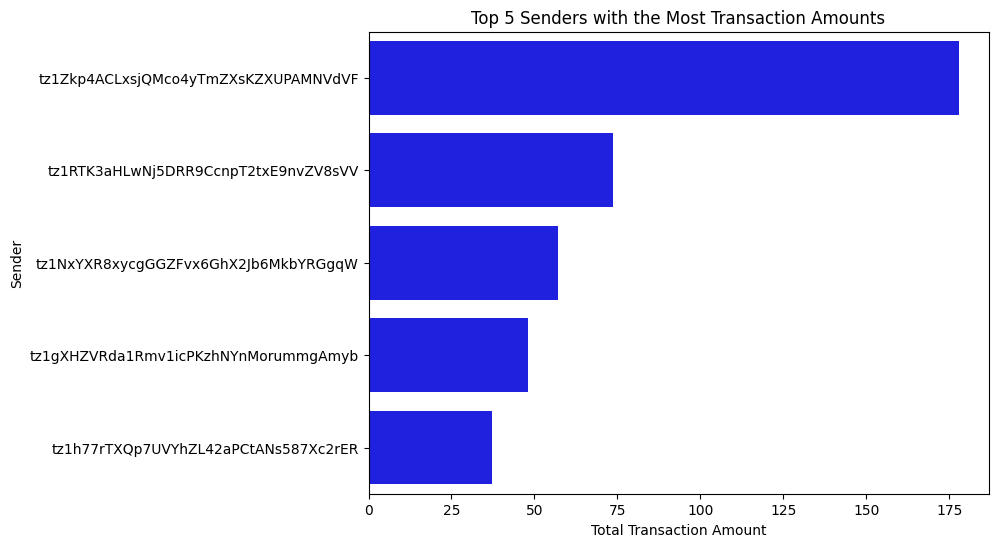

In [ ]:
#plot senders with the most transaction amount
plt.figure(figsize=(8, 6))
sns.barplot(x=senders_most_amount.values, y=senders_most_amount.index, color="blue")
plt.title('Top 5 Senders with the Most Transaction Amounts')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Sender')
plt.show()

In [ ]:
# 2. Senders with the most transactions
senders_most_transactions = df['sender'].value_counts().head(5)
senders_most_transactions

sender
tz1Zkp4ACLxsjQMco4yTmZXsKZXUPAMNVdVF    18
tz1RTK3aHLwNj5DRR9CcnpT2txE9nvZV8sVV    16
tz1NxYXR8xycgGGZFvx6GhX2Jb6MkbYRGgqW    14
tz1gXHZVRda1Rmv1icPKzhNYnMorummgAmyb    12
tz1h77rTXQp7UVYhZL42aPCtANs587Xc2rER    11
Name: count, dtype: int64

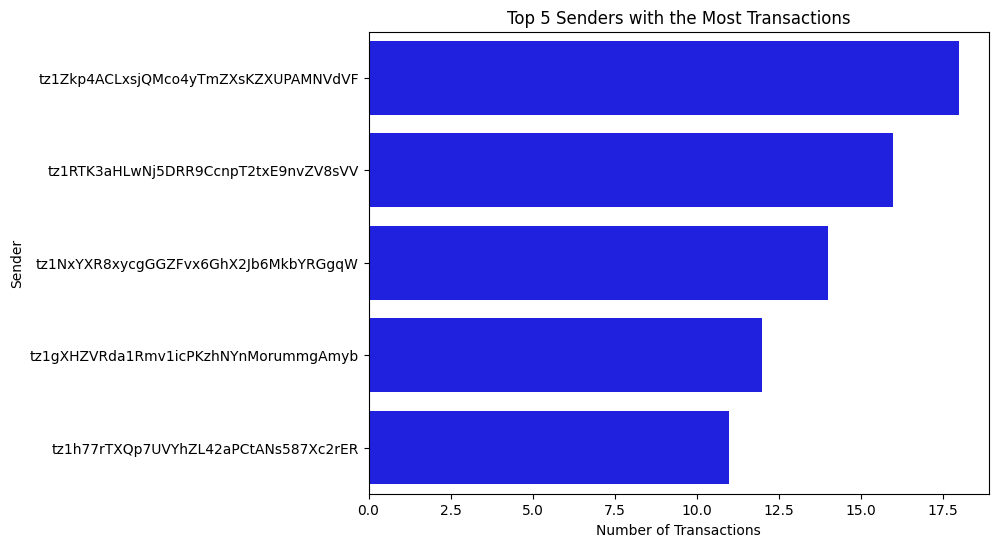

In [ ]:
#plotting senders with the most transaction
plt.figure(figsize=(8, 6))
sns.barplot(x=senders_most_transactions.values, y=senders_most_transactions.index, color="blue")
plt.title('Top 5 Senders with the Most Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Sender')
plt.show()

In [ ]:
# 3. Receivers with the most transaction amounts
receivers_most_amount = df.groupby('receiver')['amount'].sum().sort_values(ascending=False).head(5)
receivers_most_amount

receiver
tz1Smoa5JngVTfyVzHSXtMLS2JDmoyUkMWeo    177.95
tz1NWoH2sqZjvADv4hz1PXwY6gWWcNt9tNFg     73.54
tz1Ky13gH2Cmx3xvmy35KHToXR98NUQA1rNf     62.75
tz1PoRQBa6J4M6R1cPfG1oK2e1myJaXNhzfs     35.65
tz1XMVLZZcqLThurayaYFVrkkgWi6dMJNFMo     30.32
Name: amount, dtype: float64

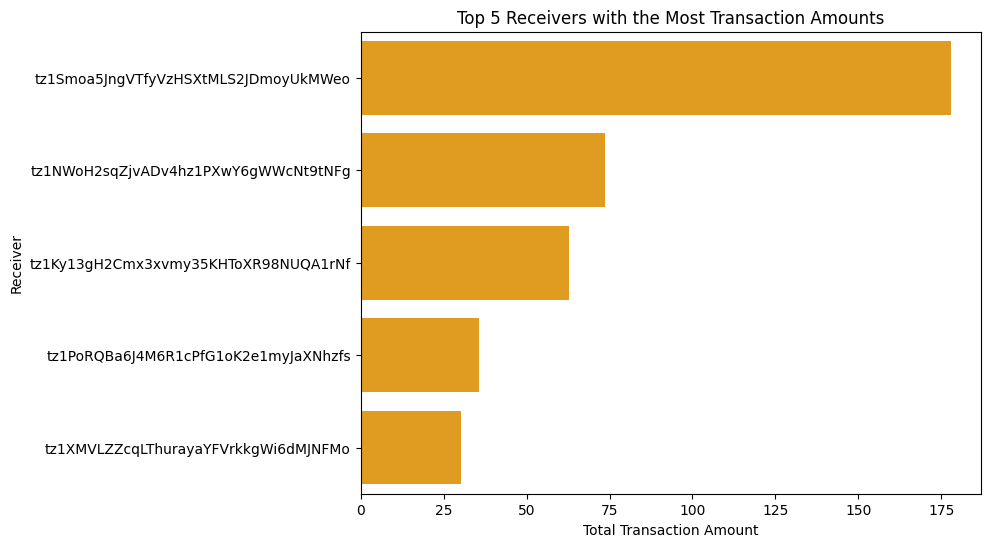

In [ ]:
#plotting receivers with the most transaction amount
plt.figure(figsize=(8, 6))
sns.barplot(x=receivers_most_amount.values, y=receivers_most_amount.index, color="orange")
plt.title('Top 5 Receivers with the Most Transaction Amounts')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Receiver')
plt.show()

In [ ]:
# 4. Receivers with the most transactions
receivers_most_transactions = df['receiver'].value_counts().head(5)
receivers_most_transactions

receiver
tz1Smoa5JngVTfyVzHSXtMLS2JDmoyUkMWeo    18
tz1NWoH2sqZjvADv4hz1PXwY6gWWcNt9tNFg    16
tz1Ky13gH2Cmx3xvmy35KHToXR98NUQA1rNf    14
tz1bWcGBtZPEnoY683kvTDxCZMJM3w7F2b4B     9
tz1PoRQBa6J4M6R1cPfG1oK2e1myJaXNhzfs     8
Name: count, dtype: int64

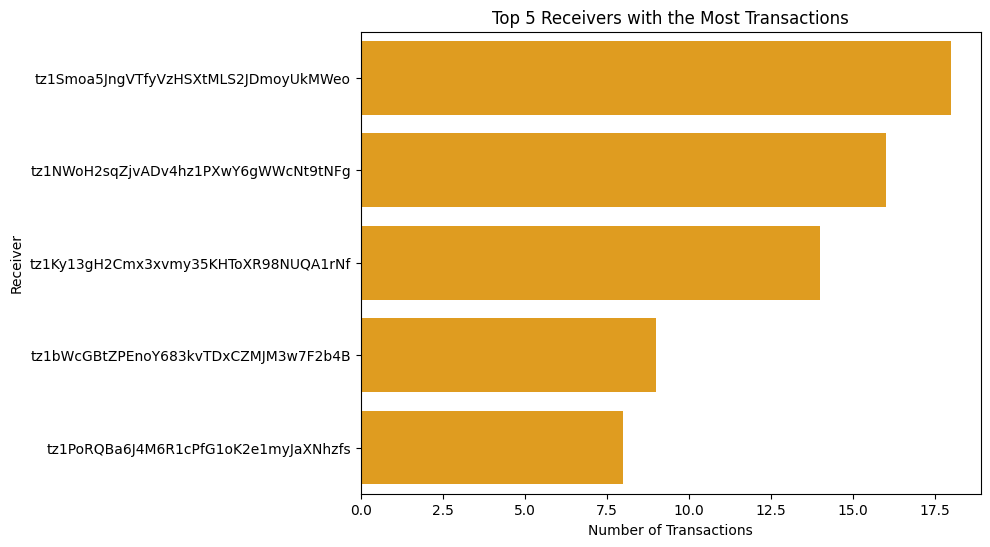

In [ ]:
#plotting receivers with most transaction
plt.figure(figsize=(8, 6))
sns.barplot(x=receivers_most_transactions.values, y=receivers_most_transactions.index, color="orange")
plt.title('Top 5 Receivers with the Most Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Receiver')
plt.show()

In [ ]:
#5 Sender and Receiver combination for most transactions together
sender_receiver_counts = df.groupby(['sender', 'receiver']).size().reset_index(name='count')
top_5_sender_receiver = sender_receiver_counts.nlargest(5, 'count')
top_5_sender_receiver

,sender,receiver,count
545,tz1Zkp4ACLxsjQMco4yTmZXsKZXUPAMNVdVF,tz1Smoa5JngVTfyVzHSXtMLS2JDmoyUkMWeo,18
231,tz1RTK3aHLwNj5DRR9CcnpT2txE9nvZV8sVV,tz1NWoH2sqZjvADv4hz1PXwY6gWWcNt9tNFg,16
497,tz1YLb8mGFwYpBhP3bs1LNSu6xJdv5khnYGD,tz1PoRQBa6J4M6R1cPfG1oK2e1myJaXNhzfs,7
0,tz1KiBm34Hwp2iAdPEFpNXC2jwX11hDyHP5y,tz1d1pEAyo6tw7cSaTxtCyJqD5XvDDmpyeBE,1
1,tz1KiCoa5QWNhZjcrVwWkoiq5TpR1tqwx1o8,tz1aMxUfYSn7iRLkyr2Ap8a1DFzc9YwMSRQt,1


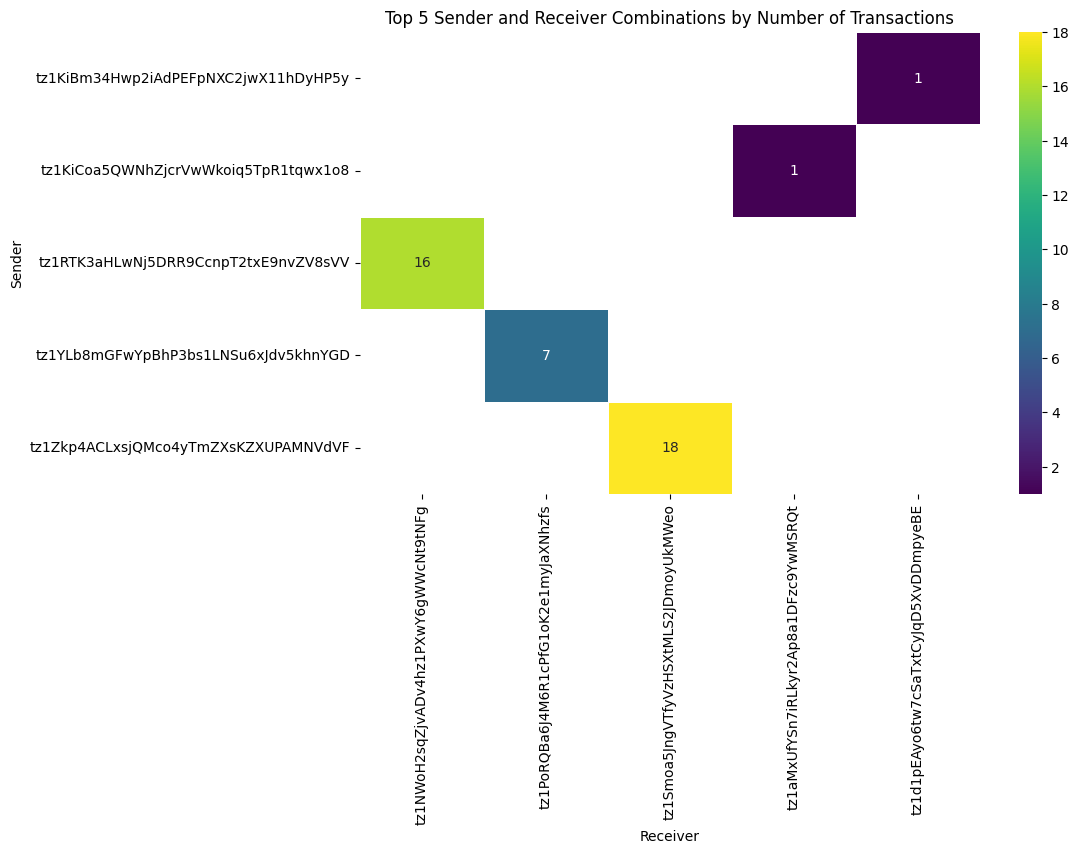

In [ ]:
#pivot table for heatmap
heatmap_data_count = top_5_sender_receiver.pivot(index='sender', columns='receiver', values='count')

# Creating heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_count, annot=True, cmap='viridis', linewidths=.5, cbar=True)
plt.title('Top 5 Sender and Receiver Combinations by Number of Transactions')
plt.xlabel('Receiver')
plt.ylabel('Sender')
plt.show()

In [ ]:
# Sender and Receiver combination for summed transactions.
sender_receiver_amounts = df.groupby(['sender', 'receiver'])['amount'].sum().reset_index(name='total_amount')
top_sender_receiver_amounts = sender_receiver_amounts.nlargest(5, 'total_amount')
top_sender_receiver_amounts

,sender,receiver,total_amount
545,tz1Zkp4ACLxsjQMco4yTmZXsKZXUPAMNVdVF,tz1Smoa5JngVTfyVzHSXtMLS2JDmoyUkMWeo,177.95
231,tz1RTK3aHLwNj5DRR9CcnpT2txE9nvZV8sVV,tz1NWoH2sqZjvADv4hz1PXwY6gWWcNt9tNFg,73.54
497,tz1YLb8mGFwYpBhP3bs1LNSu6xJdv5khnYGD,tz1PoRQBa6J4M6R1cPfG1oK2e1myJaXNhzfs,25.88
801,tz1fzfPro46Wxjr1ShH2iVEGKQfpan8LmYD5,tz1ZeMd4VGqZJZaQc88tu1qYes386qpHhLRr,9.79
535,tz1ZM4A8aCMYmXw1UF1S9LR3XRahii5v9b7a,tz1RZyJ3tLLDYcRWsGKmPHUu5L1d9hR5ujmD,9.78


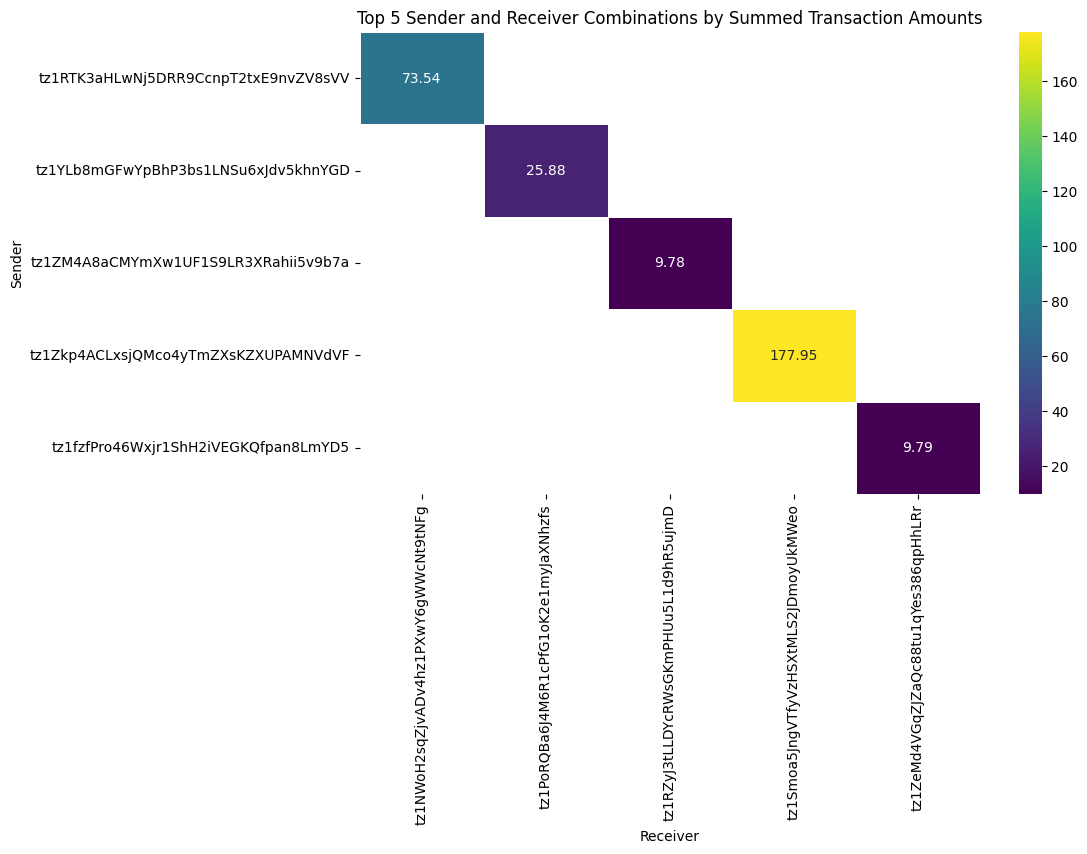

In [ ]:
# Create a pivot table for heatmap
heatmap_data_amounts = top_sender_receiver_amounts.pivot(index='sender', columns='receiver', values='total_amount')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_amounts, annot=True, fmt='.2f', cmap='viridis', linewidths=.5, cbar=True)
plt.title('Top 5 Sender and Receiver Combinations by Summed Transaction Amounts')
plt.xlabel('Receiver')
plt.ylabel('Sender')
plt.show()